In [91]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import seaborn as sbn
import numpy as np
import types
import pandas as pd

df_data_1 = pd.read_csv('Postures.csv')
df_data_1.head()

'''
The data we are using was taken from the UCI Machine Learning website. This dataset has 38 columns which include our class label, user
number, and the x,y,z coordinates for 12 different markers located on the back of a glove.  The class label of 0 serves as a 
base point for the coordiantes, where all of the values in this row are 0.  We will be trying to use these coordinates to 
determine hand position (class label).  At first glance of our data, there are many missing values in the columns representing
markers 7-11 (indicated by a ?).  We will have to look further into these columns to see if we can possibly replace these values with 
an average.  If there are too many missing values in these columns, we may have to remove them from our model.

The hand positions have some similar characteristics, and due to mising markers it may be hard to determine which one is which.  For example
a one finger and two finger point are similar and if the markers on either of the pointed fingers have missing values this will likely impact the 
classification.  Overall we expect to have some level of success in classifying hnd position through coordinates; however, due to missing values
we may not see as high of accuracies as we hope.  It will also be interesting to see which classes are mislabeled and what they were incorrectly 
labeled as.
'''

'\nThe data we are using was taken from the UCI Machine Learning website. This dataset has 38 columns which include our class label, user\nnumber, and the x,y,z coordinates for 12 different markers located on the back of a glove.  The class label of 0 serves as a \nbase point for the coordiantes, where all of the values in this row are 0.  We will be trying to use these coordinates to \ndetermine hand position (class label).  At first glance of our data, there are many missing values in the columns representing\nmarkers 7-11 (indicated by a ?).  We will have to look further into these columns to see if we can possibly replace these values with \nan average.  If there are too many missing values in these columns, we may have to remove them from our model.\n\nThe hand positions have some similar characteristics, and due to mising markers it may be hard to determine which one is which.  For example\na one finger and two finger point are similar and if the markers on either of the pointed 

## Data Exploration

In [92]:
'''
Based on the data types of each of our columns, we can see that the columns class, user, and markers 1 and 2 do not have
any missing values.  Thes columns are either of datatype int or float.  The remaining columns show us that missing values
start appearing from marker 3-11.  These columns are all listed as object type due to the missing values being indicated by
a ?
'''
df= df_data_1

df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
X5        object
Y5        object
Z5        object
X6        object
Y6        object
Z6        object
X7        object
Y7        object
Z7        object
X8        object
Y8        object
Z8        object
X9        object
Y9        object
Z9        object
X10       object
Y10       object
Z10       object
X11       object
Y11       object
Z11       object
dtype: object

In [93]:
# Check the shape of the data.  Before data cleaning and processing our data consists of 78,096 rows and 38 columns (which
# includes a class column serving as our target variable)
df.shape

(78096, 38)

In [94]:
# To count missing values we first change "?"
import numpy as np
df=df.replace({"?": np.NaN})
df.iloc[:, 11:]= df.iloc[:, 11:].astype(float) # covert objects to floats
df.head() # Check to make sure data frame is changed

Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...   Z8   X9   Y9   Z9  X10  Y10  Z10  \
0   0.000000   0.000000   0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -72.780545  36.621229  81.680557  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2 -49.596509  79.223743  43.254091  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3 -50.606259  78.451526  43.567403  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4 -52.752784  86.320630  68.214645  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   X11  Y11  Z11  
0  0.0  0.0  0.0  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN  

[5 rows x 38 columns]

### Missing Values?

In [95]:
'''
count number of mussing values for each column

At the start of our analysis it was clear that missing values may be an issue in our dataset.  Here we used isnull and sum
to determine how many missing values are present in each column.  This allowed us to determine how we want to deal with the
missing values as we work towards creating a model.  Based on this output, we can see that marker 11 coordinates have ~78,000
missing values.  Our entire dataset only contains 78096 values, so these columns will not be beneficial to models that we 
choose to create.  In fact, starting from marker 5, a lot of our data is compromised by missing values.  Some options that
we will try are 1) removing missing values, 2) fill missing values with 0, 3) fill missing value with 
column average, and 4) fill missing values with class average for column.
'''
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

### Duplicated Values?

In [96]:
"""
We have no duplicated rows within our dataset, so our main focus for assuring data quality is going to be on dealing with the
missing values that are in our dataset
"""
df.duplicated().sum()

0

### Understanding our Class Column

In [97]:
# What does each column mean and what do missing values mean?
# Class        0
# User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2 all have no missing values, would they be enough for us to make a model if we had to?

In [98]:
# Count the number of Users in each class
'''
To understand how our data is ditributed, we first looked at how many users are in each class.  This shows us that the class
5 is only represetned by 12 different users, suggesting 2 users did not have any data recorded for this hand position.  We
can also see that class 0 is represented by 1 user.  We determined that this class is the first row in our data containing
all 0 values.  This row will not be useful in our further analysis because there really is no class 0, so we will drop it 
prior to analysis.  This mainly served as a baseline for the remaining recordings

Users_per_class= df[['User','Class']].groupby(by='Class').nunique().drop(columns="Class")
print("There is no class 0 that is from the first row in our data")
Users_per_class
'''

'\nTo understand how our data is ditributed, we first looked at how many users are in each class.  This shows us that the class\n5 is only represetned by 12 different users, suggesting 2 users did not have any data recorded for this hand position.  We\ncan also see that class 0 is represented by 1 user.  We determined that this class is the first row in our data containing\nall 0 values.  This row will not be useful in our further analysis because there really is no class 0, so we will drop it \nprior to analysis.  This mainly served as a baseline for the remaining recordings\n\nUsers_per_class= df[[\'User\',\'Class\']].groupby(by=\'Class\').nunique().drop(columns="Class")\nprint("There is no class 0 that is from the first row in our data")\nUsers_per_class\n'

In [99]:
# we chose to drop the first row in our data becasue it was not valuable to our models.  This row served as a baseline
df.drop([0], inplace=True)

In [100]:
# Count the number of times a user is represented per class
'''
Here we counted the number of times a user is represented per class.  As noted above, there were two users not represented in
class 5.  From this output, we can see that users 4 and 7 are the two with no recordings in this class.  We can also see that
some users are more represetned in the data than others.  For example, users users 0, 8, 10, 11, and 13 have over 1000 instances
within each class.
''' 
class_vs_User= df.groupby(['User', 'Class'])['Class'].count().unstack().reset_index().fillna(0).set_index('User')
class_vs_User

Class       1       2       3       4       5
User                                         
0      1872.0  1501.0  1851.0  1781.0  2043.0
1      1307.0   796.0   968.0   561.0  1085.0
2      1198.0   808.0   721.0   677.0  1109.0
4        29.0    71.0   131.0   148.0     0.0
5       820.0  1143.0   926.0  1033.0  1183.0
6       738.0   962.0   779.0   744.0  1154.0
7        84.0   124.0   134.0   150.0     0.0
8      1097.0  1392.0  1670.0  1160.0  1492.0
9       653.0   918.0   676.0   832.0   841.0
10     2397.0  1481.0  2108.0  1894.0  1693.0
11     1604.0  1380.0  1601.0  1881.0  1595.0
12      712.0   941.0  1087.0  1212.0   913.0
13     2107.0  1671.0  1672.0  1771.0  1518.0
14     1647.0  1790.0  2020.0   931.0  1107.0

In [101]:
# User 4 and 7 are not represented in class 5. 


C:\Users\Malungisa\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

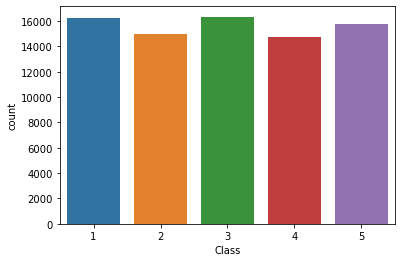

In [102]:
"""
We looked at the distribution of how many instances are in each class.  Based on this histogram, we can see that it is fairly balanced
"""
import seaborn as sbn
sbn.countplot(df['Class'])

### Statistical Summary

In [103]:
'''
Aggregates:
Used the decribe function to get a statistical analysis of our data.  There were no major things that stuck out from this.  We can see that the max values are majority within the 100s, while
the minimum values are all within the -100s.  Based on the ranges of our values it does not appear that an scaling or normalization would be necessary for our model analyses.
'''
df.describe().transpose()

count       mean        std         min        25%        50%  \
Class  78095.0   2.983776   1.421152    1.000000   2.000000   3.000000   
User   78095.0   7.959229   4.697754    0.000000   5.000000   9.000000   
X0     78095.0  50.346308  32.695886 -108.552738  29.295141  54.620245   
Y0     78095.0  85.813150  40.203448  -98.233756  63.497746  86.526334   
Z0     78095.0 -29.985096  34.361971 -126.770872 -56.356593 -30.864248   
X1     78095.0  49.595844  32.477961 -111.685241  28.755679  54.215714   
Y1     78095.0  86.193751  40.452297  -96.142589  64.156450  87.543493   
Z1     78095.0 -29.509579  34.764460 -166.006838 -57.360408 -30.185331   
X2     78095.0  48.612744  33.605155 -106.886524  25.173405  53.814592   
Y2     78095.0  83.772387  41.022710 -100.789312  58.053733  86.459935   
Z2     78095.0 -30.560906  35.120384 -129.595296 -58.654339 -32.356535   
X3     77405.0  48.492574  33.873116 -111.761053  23.861711  54.136687   
Y3     77405.0  82.064324  41.571227  -97.603414  54.072442  85.749842   
Z3     77405.0 -31.146643  35.933363 -143.540529 -59.369655 -34.015893   
X4     74975.0  48.406087  34.226361  -99.107635  22.829056  53.856778   
Y4     74975.0  80.419506  42.623146  -97.948829  48.960422  85.777670   
Z4     74975.0 -31.993556  36.398277 -157.199089 -60.548201 -35.165459   
X5     65072.0  47.042778  34.815074 -120.657868  19.538848  51.951879   
Y5     65072.0  81.394937  42.864544  -97.468548  49.252466  88.137089   
Z5     65072.0 -30.270370  36.853118 -135.699430 -58.994392 -31.714450   
X6     52247.0  45.677699  36.342190 -100.084275  15.486358  52.085617   
Y6     52247.0  83.732313  43.129421  -67.283707  51.664992  92.154280   
Z6     52247.0 -26.639238  35.709681 -153.449813 -55.374994 -26.457327   
X7     38943.0  44.463433  38.378395 -108.605639  13.081363  49.601058   
Y7     38943.0  88.463343  40.503378  -64.972157  63.541846  93.796334   
Z7     38943.0 -20.368719  33.943957 -113.733105 -45.676522 -19.428819   
X8     30563.0  48.209394  38.604623 -121.182089  17.044171  55.946737   
Y8     30563.0  86.030582  41.613479  -65.077550  53.669158  92.184916   
Z8     30563.0 -24.364841  35.736660 -142.654497 -52.521710 -22.458018   
X9     23967.0  54.749001  39.969941  -99.231688  26.114788  61.996840   
Y9     23967.0  80.545795  42.673837  -64.734284  44.037189  84.738873   
Z9     23967.0 -27.778042  36.251050 -113.397327 -55.620085 -26.800564   
X10    14752.0  53.758675  38.459845  -80.196289  20.419652  61.844638   
Y10    14752.0  74.003619  42.912355  -65.019295  37.698369  78.995937   
Z10    14752.0 -29.737987  39.678406 -112.668930 -62.964758 -32.913794   
X11       31.0 -29.697613  50.294272  -96.951690 -62.753457 -48.593433   
Y11       31.0  25.963332  36.848373  -65.432143  24.499996  38.938100   
Z11       31.0   1.697312  19.978189  -48.274677  -4.517642  11.305118   

              75%         max  
Class    4.000000    5.000000  
User    12.000000   14.000000  
X0      72.488833  190.017835  
Y0     113.108673  169.175464  
Z0      -1.419462  113.345119  
X1      71.763080  188.691997  
Y1     116.228881  170.209350  
Z1      -0.368080  104.697852  
X2      71.561988  188.760168  
Y2     106.661720  168.186466  
Z2      -0.946134  104.590879  
X3      71.435593  151.033472  
Y3     105.531551  168.292018  
Z3      -1.439540  129.316870  
X4      71.970195  172.275978  
Y4     105.483241  168.258643  
Z4      -2.141662  119.237203  
X5      71.888850  180.563322  
Y5     107.835725  167.926171  
Z5       0.117398  110.898899  
X6      72.615455  176.409004  
Y6     111.473915  168.598384  
Z6       2.433526  117.914907  
X7      75.721811  189.221529  
Y7     119.188963  169.127359  
Z7       6.591351  117.815967  
X8      79.631962  173.906643  
Y8     121.911642  169.322843  
Z8       6.418888  119.213101  
X9      83.766679  174.054403  
Y9     115.556768  167.942588  
Z9       3.066336  123.380512  
X10     83.055701  149.486224  
Y10    100.949772  168.352478  
Z1

<AxesSubplot:>

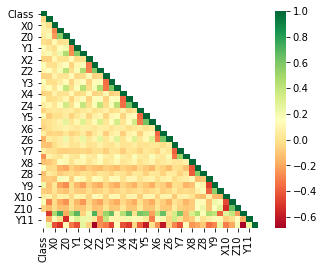

In [104]:
# vectors of the points’ covariance matrix.  Created a correlation matrix to assess the correlations.  Nothing really sticls out in this heatmap.  Many of the correaltions are around 0, indicating no correaltion among values
sbn.heatmap(df.corr(), annot=False, cmap="RdYlGn", square=True, mask=np.triu(df.corr(), k=1))

In [105]:
'''
values for correlation plot.  There are no correlations that seem important in this data.  They all seem independent of one another for the most part, this would be more concerning in a regression
model.  For our purposes however, we do not see an issue with any of these correlations.
'''
df.corr()

Class      User        X0        Y0        Z0        X1        Y1  \
Class  1.000000 -0.030714  0.080171  0.081755  0.051857 -0.010569  0.144086   
User  -0.030714  1.000000 -0.013757  0.070174  0.192040 -0.042662  0.041749   
X0     0.080171 -0.013757  1.000000 -0.285309 -0.236421  0.124098 -0.009081   
Y0     0.081755  0.070174 -0.285309  1.000000  0.551040 -0.001308  0.133272   
Z0     0.051857  0.192040 -0.236421  0.551040  1.000000  0.014811  0.209621   
X1    -0.010569 -0.042662  0.124098 -0.001308  0.014811  1.000000 -0.293841   
Y1     0.144086  0.041749 -0.009081  0.133272  0.209621 -0.293841  1.000000   
Z1     0.089920  0.183294  0.033114  0.225575  0.464169 -0.261201  0.572805   
X2    -0.052392 -0.059534  0.106138  0.005399  0.008759  0.139524 -0.027760   
Y2     0.169251  0.000980 -0.012697  0.082107  0.149608 -0.050989  0.108027   
Z2     0.095538  0.155609  0.023501  0.187811  0.420445 -0.012305  0.184192   
X3    -0.056177 -0.049257  0.089754  0.011355  0.014570  0.129513 -0.035403   
Y3     0.169591 -0.011203 -0.013476  0.060191  0.124843 -0.047960  0.100235   
Z3     0.081781  0.135449  0.021409  0.162587  0.392759 -0.014291  0.178978   
X4    -0.055829 -0.036227  0.076247  0.004582  0.002525  0.110748 -0.033371   
Y4     0.167531 -0.022904 -0.004270  0.035461  0.104332 -0.047221  0.079952   
Z4     0.050899  0.106128  0.028773  0.130547  0.350720 -0.006478  0.155010   
X5    -0.052505  0.019449  0.040768  0.027914  0.053378  0.066549 -0.006602   
Y5     0.119372 -0.080142 -0.006776 -0.003342  0.056826 -0.051391  0.034954   
Z5    -0.027581  0.004388  0.037922  0.079592  0.273055  0.019950  0.103526   
X6    -0.051941 -0.008239  0.036193  0.052863  0.082253  0.057848  0.026654   
Y6     0.062182 -0.049142 -0.030819 -0.043992  0.024148 -0.057098 -0.022240   
Z6    -0.157333  0.052815  0.022022  0.055574  0.223353  0.015850  0.065375   
X7    -0.106844 -0.116611 -0.014180  0.046878  0.076478  0.014769  0.022077   
Y7     0.062849 -0.003514 -0.011190 -0.062939 -0.063664 -0.046271 -0.043875   
Z7    -0.248762  0.091698  0.033558  0.010200  0.111081  0.035481  0.013566   
X8    -0.119390 -0.090490 -0.035382  0.146033  0.103397  0.004793  0.096061   
Y8     0.167639 -0.031780 -0.019481 -0.162183 -0.197063 -0.062308 -0.119121   
Z8    -0.119719  0.043412  0.004108 -0.080228 -0.034222 -0.017843 -0.056383   
X9    -0.086485 -0.067971 -0.101995  0.178010  0.132988 -0.056337  0.146685   
Y9     0.232564 -0.112565  0.032410 -0.203045 -0.271250 -0.010801 -0.151652   
Z9    -0.075394 -0.084014  0.015183 -0.080253 -0.114245  0.002129 -0.070808   
X10    0.053305  0.087072 -0.030107  0.087027  0.072148 -0.033700  0.101273   
Y10    0.172429 -0.295135 -0.019111 -0.186988 -0.259939 -0.007443 -0.155724   
Z10   -0.048026 -0.127468 -0.013788 -0.116858 -0.122325 -0.000375 -0.097226   
X11         NaN -0.487487  0.474625  0.746105 -0.182908  0.481411  0.684425   
Y11         NaN -0.176602  0.178232 -0.005051 -0.536334  0.169304  0.302510   
Z11         NaN  0.233024 -0.428560 -0.513149  0.121903 -0.317766 -0.429865   

             Z1        X2        Y2  ...        Z8        X9        Y9  \
Class  0.089920 -0.052392  0.169251  ... -0.119719 -0.086485  0.232564   
User   0.183294 -0.059534  0.000980  ...  0.043412 -0.067971 -0.112565   
X0     0.033114  0.106138 -0.012697  ...  0.004108 -0.101995  0.032410   
Y0     0.225575  0.005399  0.082107  ... -0.080228  0.178010 -0.203045   
Z0     0.464169  0.008759  0.149608  ... -0.034222  0.132988 -0.271250   
X1    -0.261201  0.139524 -0.050989  ... -0.017843 -0.056337 -0.010801   
Y1     0.572805 -0.027760  0.108027  ... -0.056383  0.146685 -0.151652   
Z1     1.000000 -0.009229  0.175180  ...  0.001208  0.103956 -0.217496   
X2    -0.009229  1.000000 -0.316751  ... -0.011612 -0.012402 -0.056978   
Y2     0.175180 -0.316751  1.000000  ... -0.052061  0.129293 -0.147458   
Z2     0.455480 -0.299815  0.587827  ...  0.018216  0.102365 -0.186313   
X3    -0.017707  0.141245 -0.059818  ...

## Drop all missing values from dataset

In [106]:
'''
Becasue marker 11 only has 32 non-null values, dropping every missing value from our data is not realistic.  If we were to
drop all rows with missing values, we would end up with 32 rows remaining.  Instead of just removing all missing values, we
decided to drop the marker coordiantes whose columns have more than 10,000 missing values.  Doing this would not largely 
impact the shape of our data and we will instead only lose ~3000 columns.  In this scenario however, we will be reducing our
column number to 15 columns (representing markers 1-4).
'''
df_rm = df[['Class', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2','Y2','Z2','X3','Y3','Z3','X4','Y4','Z4']]
df_rm.head()

Class         X0         Y0         Z0         X1         Y1         Z1  \
1      1  54.263880  71.466776 -64.807709  76.895635  42.462500 -72.780545   
2      1  56.527558  72.266609 -61.935252  39.135978  82.538530 -49.596509   
3      1  55.849928  72.469064 -62.562788  37.988804  82.631347 -50.606259   
4      1  55.329647  71.707275 -63.688956  36.561863  81.868749 -52.752784   
5      1  55.142401  71.435607 -64.177303  36.175818  81.556874 -53.475747   

          X2         Y2         Z2         X3         Y3         Z3  \
1  36.621229  81.680557 -52.919272  85.232264  67.749220 -73.684130   
2  79.223743  43.254091 -69.982489  87.450873  68.400808 -70.703991   
3  78.451526  43.567403 -70.658489  86.835388  68.907925 -71.138344   
4  86.320630  68.214645 -72.228461  61.596157  11.250648 -68.956425   
5  76.986143  42.426849 -72.574743  86.368748  67.901260 -72.444650   

          X4         Y4         Z4  
1  59.188576  10.678936 -71.297781  
2  61.587452  11.779919 -68.827418  
3  61.686427  11.793440 -68.889316  
4  77.387225  42.717833 -72.015146  
5  61.275402  10.841109 -69.279906

In [107]:
'''
Here we removed all the missing values from the remaining columns we chose to use for this model. In this case, we kept 
columns for markers 1-4.  This resulted in a remaining 16 columns to be used for this particular model.  Once we remove 
the missing values, we can move forward with our classification model.
'''
df_rm.dropna(inplace=True)

<ipython-input-107-ccf332d3526c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rm.dropna(inplace=True)


In [108]:
# After dropping the rows that still contained missing values, we had 74,976 rows remaining to use for the model
df_rm.shape

(74975, 16)

### Model Building

In [109]:
#Set up response and independent variables.  X consists of the 15 attribute columns and y is our one target variable column
X = df_rm.loc[:, df_rm.columns != 'Class'] 
y=df_rm["Class"]

xform= X

In [110]:
#For this model, we did a random 80/20 split.  This resulted in 59,980 rows in our training set and 14,995
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (59980, 15) (59980,)
Test set: (14995, 15) (14995,)


### One vs All Classification Model

In [111]:
'''
Once our data was split into training and test sets, we were able to run our model.  For our models we used the SGD classifier
and performed both one vs one and one vs all models.  We can then compare the performance of these models to determine, which
model was more effective at accomplishing our goal, which is determining hand position based on coordinates.
'''

from sklearn.linear_model import SGDClassifier
import numpy as np
sgd_clf_rm = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf_rm.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

#### Training Set

In [112]:
'''
When cross validation is performed on this model, there is a large variation between test folds.The accuracy ranges from 
0.27-0.46.  This is not a very high accuracy/success rate.  This first model was an OvA, so we are going to assess how a 
OvO model performs in comparison.  This low accuracy also suggests that the attributes/markers being used to train
our model, may not be the most effective.  This model contains only 15 of the original 36 coordinate columns, so we will also
attempt models that keep all columns but replace missing values instead of removing them.
'''
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf_rm, X_train, y_train, cv=3, scoring="accuracy")

array([0.4639892 , 0.42925024, 0.27374581])

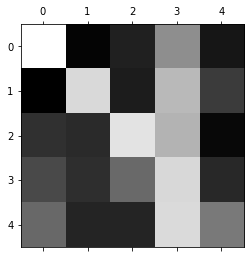

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\nThis confusion matrix looks pretty scattered, indicating that there were multiple classes that were incorrectly classified as\nanother class.  Class 0 (fist) appears to have been identified correctly based on the light coloration on the diagonal.  The\nremaining classes had incorrect classification throughout them.  \n- Classes 1(stop) and 2(one finger point) both appear to have been misclassified as class 3 (two finger point).\n- Class 3 was misclassified as class 2, which is understandable due to either being one finger pointing or 2 fingers pointing\n    which are very similar hand positions.\n- Class 4 also seems to be more often classified as class 3.  I had expected 4 to be classified more similarly to class 0, \n  due to the closer resemblance of a fist\n\nOverall it appears that most of the classes were incorrectly classified to be class 3.    \n'

In [113]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(sgd_clf_rm, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab
This confusion matrix looks pretty scattered, indicating that there were multiple classes that were incorrectly classified as
another class.  Class 0 (fist) appears to have been identified correctly based on the light coloration on the diagonal.  The
remaining classes had incorrect classification throughout them.  
- Classes 1(stop) and 2(one finger point) both appear to have been misclassified as class 3 (two finger point).
- Class 3 was misclassified as class 2, which is understandable due to either being one finger pointing or 2 fingers pointing
    which are very similar hand positions.
- Class 4 also seems to be more often classified as class 3.  I had expected 4 to be classified more similarly to class 0, 
  due to the closer resemblance of a fist

Overall it appears that most of the classes were incorrectly classified to be class 3.    
'''

#### Testing Set

In [114]:
'''
When using our trained model on our test set, the accuracy decreases.  This suggests to us that our model may not be effective
in accuratley classifying new information/records.
'''
cross_val_score(sgd_clf_rm, X_test, y_test, cv=3, scoring="accuracy")

array([0.34486897, 0.28411365, 0.39455782])

### One vs One Classification Model

#### Training Set

In [115]:
'''
Still using the data with removed missing values, we also trained a OvO classifiction model.  The training and tests as used
here are the same as the OvA model trained previously.  Compared to the OvA model, this OvO model had similar accuracy.  However, 
there is a difference in the ranges of accuracy.  The variation in this OvO model is smaller with a range between 0.39-0.44.
Because these accuracies are more consistent during the cross validation, this model appears to perform better.
'''

from sklearn.multiclass import OneVsOneClassifier
ovo_clf_rm = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf_rm.fit(X_train, y_train)

print("There are", len(ovo_clf_rm.estimators_), "estimators.")

print("Accuracy:",cross_val_score(ovo_clf_rm, X_test, y_test, cv=3, scoring="accuracy").mean())


cross_val_score(ovo_clf_rm, X_train, y_train, cv=3, scoring="accuracy")

There are 10 estimators.
Accuracy: 0.4107403313395772


array([0.42927878, 0.39223728, 0.44640624])

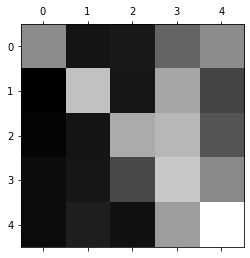

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nUnlike the previous OvA model, this OvO model appears to have incorrectly classified 0 as 4.  This resembles more of what I\nhad originally thought.  A fist and grab hand posture have a more similar resemblance, so it is understandable to me that the\nmodel might have a harder time differentiating these two from one another.  Pretty much all the classes had instances \nincorrectly classified as class 3, which is still similar to the previous model.  Another major change from the previous model\nis that class 4 was correctly classified more often, represented by the lighter square on the diagonal.  Overall, this confusion\nmatrix shows that the OvO model was slightly better at predicting class.\n'

In [116]:
y_train_pred = cross_val_predict(ovo_clf_rm, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

Unlike the previous OvA model, this OvO model appears to have incorrectly classified 0 as 4.  This resembles more of what I
had originally thought.  A fist and grab hand posture have a more similar resemblance, so it is understandable to me that the
model might have a harder time differentiating these two from one another.  Pretty much all the classes had instances 
incorrectly classified as class 3, which is still similar to the previous model.  Another major change from the previous model
is that class 4 was correctly classified more often, represented by the lighter square on the diagonal.  Overall, this confusion
matrix shows that the OvO model was slightly better at predicting class.
'''

#### Testing Set

In [117]:
'''
When using our trained model on our test set, the accuracy is fairly similar to the training set.  Our previous model showed
decreased accuracy when used on the test set, so again the OvO model seems to be performing better.  Based on the above confusion
matrix however, it seems that different classes are being mislabled compared to the OvA model.
'''
cross_val_score(ovo_clf_rm, X_test, y_test, cv=3, scoring="accuracy")

array([0.35947189, 0.3927571 , 0.479992  ])

### PCA Analysis

In [118]:
#PCA using SCIKIT Learn
'''
In an effort to continue increasing our accuracy, we also performed PCA analysis to use the attributes that best describe
the variation.  For this PCA analysis and all future PCA analyses, we used 0.95 variance to determine how many components to
be used for our new models.  For this first model, there were 13 components needed to reach 95% variance covered.  This does
not reduce our original column number by much, since we originally started with 15.  Only two columns were removed for this 
analysis
'''
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

13

#### One vs One Analysis after PCA

In [119]:
'''
We again started with the OvA classification model.  When training this model, we used our reduced X_train data to create a 
new model
'''
sgd_clf_PCA_rm = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf_PCA_rm.fit(X_reduced, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [120]:
'''
Compared to the previous model thus far, the use of PCA appears to have been beneficial when trying to improve accuracy.  This
model had an accuracy ranging from 0.56-0.59, which is a pretty good improvement from the previous modeling.  Both the accuracy
increased and the variation between the test folds decreased.  Originally, the OvO model performed better than the OvA 
model, so next we will see if this stays consistent when looking at our reduced X_train set
'''
cross_val_score(sgd_clf_PCA_rm, X_reduced, y_train, cv=3, scoring="accuracy")

array([0.56156847, 0.56739859, 0.59315761])

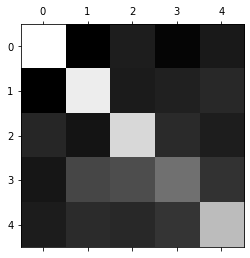

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nCompared to the previous confusion matrices, this confusion matrix appears to be less scattered, which is representative of\nthe higher accuracy of this PCA model.  The squares lying on the diagonal have lighter colors indicating correct classificaion.\nThis is true for classes 0, 1, and 2.  There also appears to be fewer misclassifications of other classes as class 3.  Instead\nthis model appears to have class three misclassified the most often as either 2 or 1.  Again, these misclassifications make\nlogical sense due to the similarity of hand positions between stop, one finger pointed, and two fingers pointed. \n'

In [121]:
y_train_pred = cross_val_predict(sgd_clf_PCA_rm, X_reduced, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

Compared to the previous confusion matrices, this confusion matrix appears to be less scattered, which is representative of
the higher accuracy of this PCA model.  The squares lying on the diagonal have lighter colors indicating correct classificaion.
This is true for classes 0, 1, and 2.  There also appears to be fewer misclassifications of other classes as class 3.  Instead
this model appears to have class three misclassified the most often as either 2 or 1.  Again, these misclassifications make
logical sense due to the similarity of hand positions between stop, one finger pointed, and two fingers pointed. 
'''

#### One vs All Analysis after PCA

In [122]:
'''
We now used the OvO classification method with our reduced X_train set.  Again, PCA did have a positive effect on our accuracy
The accuracy now ranges from 0.51-0.54.  While this model is an improvement from the non-PCA implemented models, it did not
have better accuracy compared to the OvA PCA model.  They were quite similar, however the OvA model performed slightly better
when looking at accuracy.
'''

ovo_clf_PCA_rm = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf_PCA_rm.fit(X_train, y_train)

cross_val_score(ovo_clf_PCA_rm, X_reduced, y_train, cv=3, scoring="accuracy")

array([0.51815545, 0.51287951, 0.54854199])

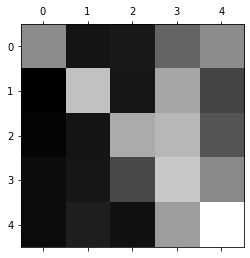

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nThe decline of accuracy in comparison to the above model is represented by this confusion matrix.  While the diagonal still\ncontains lighter squares, there appears to be more variation in the surrounding squares.  One noticable change is the number\nof classes again being misclassified as class 3.  Throughout all of the models thus far, class 3 has had the largest\nimpact on classification accuracy\n'

In [123]:
y_train_pred = cross_val_predict(ovo_clf_PCA_rm, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

The decline of accuracy in comparison to the above model is represented by this confusion matrix.  While the diagonal still
contains lighter squares, there appears to be more variation in the surrounding squares.  One noticable change is the number
of classes again being misclassified as class 3.  Throughout all of the models thus far, class 3 has had the largest
impact on classification accuracy
'''

### Descision Tree Classifier 

In [124]:
'''
One final model that we decided to try was the decision tree.  Here we are creating the classifier and training it with the above training sets created for the previous models (SGD classifier)
We then used the model to predict the y values based on the test set.  
'''
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating Model

In [125]:
'''
From this we were able to calculate accuracy.  The decision tree model performed better than all of the SGD classifiers trained
above.  This had an accuracy of 0.90 
'''

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9137712570856952


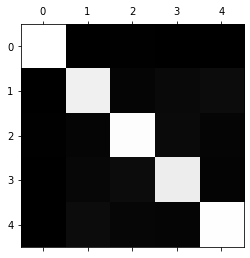

In [126]:
# Add a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.110188 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.110188 to fit



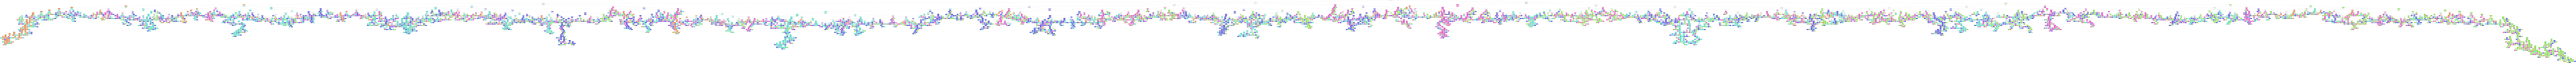

In [128]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_test.columns,class_names=["fist", 'stop','one finger point','two finger point','grab'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision_Tree_Classifier.png')
Image(graph.create_png())

## Replace all missing values with 0

In [40]:
'''
Here we are creating a dataframe that converts all the missing values to a value of 0.  Although some of the markers have 
majority of missing values, we still replaced those missing values as well.  We will use this dataframe to create a model that
can be compared to other models taking a number of different approaches
''' 
df_0=df.replace({np.NaN:0}) #replace all missing values in dataframe with a 0
df_0.head() # Check to make sure data frame is changed

Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
5      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2  ...   Z8   X9   Y9   Z9  X10  Y10  Z10  \
1 -72.780545  36.621229  81.680557  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -49.596509  79.223743  43.254091  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -50.606259  78.451526  43.567403  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -52.752784  86.320630  68.214645  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5 -53.475747  76.986143  42.426849  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   X11  Y11  Z11  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0  
5  0.0  0.0  0.0  

[5 rows x 38 columns]

In [41]:
'''
To use this df for modeling, all the columns previously listed as object types must be converted to numerical types.  Here 
we converted all object type columns to type float, which can then be ran through a model.
'''
df_0.iloc[:, 11:]= df_0.iloc[:, 11:].astype(float) # covert objects to floats
df_0.dtypes #check dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3       float64
Y3       float64
Z3       float64
X4       float64
Y4       float64
Z4       float64
X5       float64
Y5       float64
Z5       float64
X6       float64
Y6       float64
Z6       float64
X7       float64
Y7       float64
Z7       float64
X8       float64
Y8       float64
Z8       float64
X9       float64
Y9       float64
Z9       float64
X10      float64
Y10      float64
Z10      float64
X11      float64
Y11      float64
Z11      float64
dtype: object

### Model Building

In [42]:
#Here we dropped the user column from the df.  We only wanted to use the coordiantes for each marker as our predictors, so for this model user was removed.
df_0.drop(['User'], axis=1, inplace = True)

In [43]:
#Set up response and independent variables.  X consists of the 36 attribute columns and y is our one target variable column ("Class")
X = df_0.loc[:, df_0.columns != 'Class'] 
y=df_0["Class"]

In [44]:
#Again, we did a random 80/20 split.  This resulted in 62,476 rows in our training set and 15,619 rows in our test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (62476, 36) (62476,)
Test set: (15619, 36) (15619,)


#### SGD Classifier: One vs All

In [45]:
'''
Once our data was split into training and test sets, we were able to run our model.  We again started with the OvA model which
will be compared to the OvO model.  We will then also conduct PCA to see if a reduction in attributes benefits our model.
'''
sgd_clf_0 = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf_0.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

#### Training Set

In [46]:
'''
This first model already shows a lot of imporvement, accuracy-wise, compared to the models with removed missing values.
Replacing the values with 0 allowed us to maintain the values present in columns dominated by missing values.  It seems that
the values previously removed were a beneficial addition to this model
'''
cross_val_score(sgd_clf_0, X_train, y_train, cv=3, scoring="accuracy")

array([0.67247671, 0.62372149, 0.72336134])

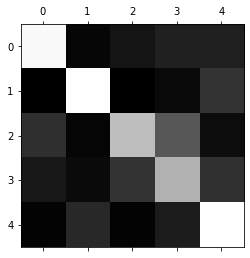

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nThis confusion matrix has the lighter colored squares positioned on the diagonal.  This indicates that classes were being \ncorrectly identified.  Based on accuracy, there are clearly areas where this model did not perform well.  Again, similar \nto previous models, there was confusion when classifying class 2 as 3 and vice versa.  Again, the similarity of hand position\nmakes these results understandable.  Similar position leads to more confusion and misclassification.\n'

In [47]:
y_train_pred = cross_val_predict(sgd_clf_0, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

This confusion matrix has the lighter colored squares positioned on the diagonal.  This indicates that classes were being 
correctly identified.  Based on accuracy, there are clearly areas where this model did not perform well.  Again, similar 
to previous models, there was confusion when classifying class 2 as 3 and vice versa.  Again, the similarity of hand position
makes these results understandable.  Similar position leads to more confusion and misclassification.
'''

#### Testing Set

In [48]:
'''
When using our trained model on our test set, the accuracy is fairly similar to the training set for the OvA model.  The testing
set overall has slighty lower accuracy.  From the above confusion matrix, we were able to see where issues in classification were
occuring.  While accuracy could still use improvement, this model was able to better classify new data compared to the missing
values removed models.
'''
cross_val_score(sgd_clf_0, X_test, y_test, cv=3, scoring="accuracy")

array([0.62358364, 0.68113715, 0.61409912])

### SGD Classifier: One vs One 

#### Training Set

In [49]:
'''
Still using the data with 0s replacing missing values, we also trained a OvO classifiction model.  The training and tests as used
here are the same as the OvA model trained previously.  Compared to the OvA model, this OvO model had similar accuracy with 
similar variation among the test folds.  Based solely on accuracy, one model does not appear better than the other.  For this
reason, the OvA model may be used due to being less consuming than the OvO model; however, both seem equally effective.
'''
ovo_clf_0 = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf_0.fit(X_train, y_train)

cross_val_score(ovo_clf_0, X_train, y_train, cv=3, scoring="accuracy")

array([0.69129934, 0.70372149, 0.65416567])

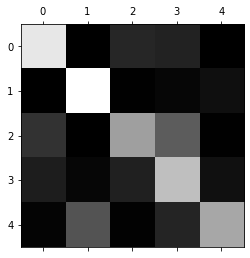

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model, class 1(stop) was correctly classified ~100% of the time.  Classes 2, 3, and 4 have more variation in color\nindicating misclassified instances.  For the most part, the same trends continued from previous models where classes 2 and 3 \nwere confused with one another most often\n'

In [50]:
y_train_pred = cross_val_predict(ovo_clf_0, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model, class 1(stop) was correctly classified ~100% of the time.  Classes 2, 3, and 4 have more variation in color
indicating misclassified instances.  For the most part, the same trends continued from previous models where classes 2 and 3 
were confused with one another most often
'''

#### Training Set

In [51]:
'''
When using our trained model on our test set, the accuracy is fairly similar to the training set.  The above confusion matrix
gives us an idea of where the inaccuracies are occuring.
'''
cross_val_score(ovo_clf_0, X_test, y_test, cv=3, scoring="accuracy")

array([0.67121183, 0.7189781 , 0.62216673])

## PCA Analysis

In [52]:
'''
Again in an effort to increase accuracy we did PCA on the data with missing values replaced as 0.  In this PCA there are 26 
components in the reduced X_train set.  This means that there are now 10 attributes no longer being used for the next model
analysis.
'''

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

26

#### One vs All after PCA 

In [53]:
'''
We again started with the OvA classification model.  When training this model, we used our reduced X_train data to create a 
new model
'''

sgd_clf_PCA_0 = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf_PCA_0.fit(X_reduced, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [54]:
'''
The PCA model again had increased accuracy compared to the previous model.  The accuracy of this OvA model after PCA ranged
from 0.73-0.76. Which thus far has been the best model accuracy wise.
'''
cross_val_score(sgd_clf_PCA_0, X_reduced, y_train, cv=3, scoring="accuracy")

array([0.73950831, 0.73114046, 0.76806723])

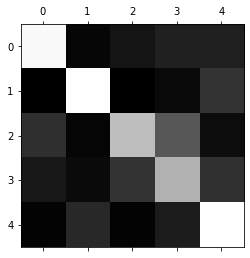

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the \ndiscrepancies occur around the class 2 and 3 classification, consistent with previous models. \n'

In [55]:
y_train_pred = cross_val_predict(sgd_clf_PCA_0, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the 
discrepancies occur around the class 2 and 3 classification, consistent with previous models. 
'''

#### One vs One after PCA

In [56]:
'''
This OvO model had an accuracy range of 0.72-0.74.  This is almost similar to the OvA analysis, but is slightly less accurate,
when solely comapring accuracy cross validation
'''
ovo_clf_PCA_0 = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf_PCA_0.fit(X_train, y_train)

cross_val_score(ovo_clf_PCA_0, X_reduced, y_train, cv=3, scoring="accuracy")

array([0.74824738, 0.73666267, 0.72264106])

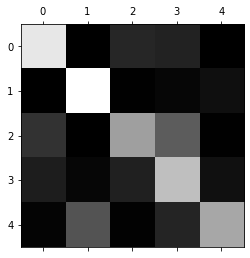

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the \ndiscrepancies occur around the class 2 and 3 classification, consistent with previous models.  One other square that sticks\nout is class 4 being classified as class one, which seems a little odd, however the lack of values may be impacting how the\ncoordiantes are percieved.\n'

In [57]:
y_train_pred = cross_val_predict(ovo_clf_PCA_0, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the 
discrepancies occur around the class 2 and 3 classification, consistent with previous models.  One other square that sticks
out is class 4 being classified as class one, which seems a little odd, however the lack of values may be impacting how the
coordiantes are percieved.
'''

## Descision Tree Classifier 

In [58]:
'''
Again we used the decision tree classifier to try for better accuracy.  Here we are creating the classifier and training it with the above training sets created for the previous models (SGD classifier)
We then used the model to predict the y values based on the test set.  
'''
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

###  Evaluating Model

In [59]:
# Model Accuracy, how often is the classifier correct?
'''
From this we were able to calculate accuracy.  The decision tree model performed better than all of the SGD classifiers trained
above.  This had an accuracy of 0.96, which is better than the previous decision tree classifier accuracy as well
'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9620334208336001


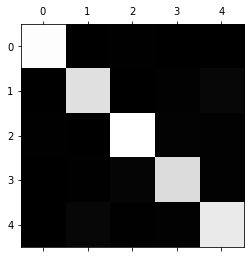

In [60]:
# Add a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

## Replacing all missing values Using Multivariate feature imputation


In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)

imp.fit(df.dropna().tail(4))
IterativeImputer(random_state=0)
# the model learns from rows with all data the uses that to fill in missing values
df_Imputed= imp.transform(df)

# Turn numpy array to pandas dataframe
df_Imputed = pd.DataFrame(data=df_Imputed, columns=df.columns)
df_Imputed

Class  User         X0          Y0         Z0         X1          Y1  \
0        1.0   0.0  54.263880   71.466776 -64.807709  76.895635   42.462500   
1        1.0   0.0  56.527558   72.266609 -61.935252  39.135978   82.538530   
2        1.0   0.0  55.849928   72.469064 -62.562788  37.988804   82.631347   
3        1.0   0.0  55.329647   71.707275 -63.688956  36.561863   81.868749   
4        1.0   0.0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78090    5.0  14.0  54.251127  129.177414 -44.252511  27.720784  107.810661   
78091    5.0  14.0  54.334883  129.253842 -44.016320  27.767911  107.914808   
78092    5.0  14.0  54.151540  129.269502 -44.173273  27.725978  108.034006   
78093    5.0  14.0  27.915311  108.007390  10.814957  -0.910435  122.464093   
78094    5.0  14.0  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...         Z8         X9         Y9  \
0     -72.780545  36.621229   81.680557  ... -19.653418 -54.039722  -7.465229   
1     -49.596509  79.223743   43.254091  ... -17.835306 -60.159145 -12.909728   
2     -50.606259  78.451526   43.567403  ... -17.901952 -59.888852 -12.870282   
3     -52.752784  86.320630   68.214645  ... -13.542173 -82.053057  -7.232679   
4     -53.475747  76.986143   42.426849  ... -17.979117 -59.688051 -12.737778   
...          ...        ...         ...  ...        ...        ...        ...   
78090  11.099282  -1.270139  122.758679  ...  -6.543115  87.733364  61.216363   
78091  11.069842 -30.334054   77.858214  ... -62.130563  78.229847  33.078407   
78092  11.020347 -22.574718  104.222208  ...   3.835904  78.591554  32.327738   
78093 -47.271248 -30.084588   77.705861  ... -63.221626 -45.878056 -15.804962   
78094 -17.453099  -1.091566  122.827638  ... -63.026574  78.879653  31.603100   

              Z9        X10        Y10        Z10        X11        Y11  \
0     -12.816728  -2.182654 -59.547283 -23.224961 -89.565501  20.167293   
1     -23.006827 -20.345823 -43.762504 -23.568810 -75.468574  21.932137   
2     -22.845807 -20.036878 -43.946634 -23.495615 -75.619382  21.854924   
3     -24.997330 -28.424202 -37.631391 -24.414793 -72.405226  19.318795   
4     -22.647847 -19.752323 -43.777463 -23.157058 -75.494176  21.434250   
...          ...        ...        ...        ...        ...        ...   
78090 -62.126278  -8.367343 -43.925031 -15.160945 -74.009534  14.946138   
78091 -45.249543   4.260755 -71.570610 -28.251186 -98.662062  27.736398   
78092 -46.166556  16.090202 -71.593309 -19.820463 -99.404456  16.760955   
78093 -20.517672 -13.011538 -50.060649 -23.380874 -79.562541  23.785014   
78094 -47.013736   3.742697 -70.153366 -27.493486 -96.641654  28.273494   

             Z11  
0     -15.712912  
1      -7.033590  
2      -7.119692  
3     -12.541542  
4      -7.310103  
...          ...  
78090  -5.483321  
78091 -13.178174  
78092 -20.497605  
78093  -4.646213  
78094  -9.925063  

[78095 rows x 38 columns]

## Building a Model

In [62]:
#Here we dropped the user column from the df.  We only wanted to use the coordiantes for each marker as our predictors, so for this model user was removed.
df_Imputed.drop(['User'], axis=1, inplace = True)

In [63]:
#Set up response and independent variables.  X consists of the 36 attribute columns and y is our one target variable column
X = df_Imputed.loc[:, df_Imputed.columns != 'Class'] 
y=df_Imputed["Class"]

In [64]:
#Train and test dataset, using a random 80/20 split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (62476, 36) (62476,)
Test set: (15619, 36) (15619,)


### SGD Classifier: One vs All

In [65]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.73662729, 0.75462185, 0.74165666])

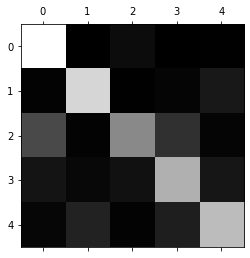

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the \ndiscrepancies occur around the class 2 and 3 classification, consistent with previous models.  One other square that sticks\nout is class 2 being classified as class 0.  While classes 2 and 3 have more similar hand positions, if markers representing the\nsingle finger are missing records, it could be possible to misodentify as a fist.\n'

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the 
discrepancies occur around the class 2 and 3 classification, consistent with previous models.  One other square that sticks
out is class 2 being classified as class 0.  While classes 2 and 3 have more similar hand positions, if markers representing the
single finger are missing records, it could be possible to misodentify as a fist.
'''

### SGD Classifier: One vs One

In [67]:
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)

print("There are", len(ovo_clf.estimators_), "estimators.")

print("Accuracy:",cross_val_score(ovo_clf, X_test, y_test, cv=3, scoring="accuracy").mean())


cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

There are 10 estimators.
Accuracy: 0.7437065041166866


array([0.78094689, 0.76787515, 0.70232893])

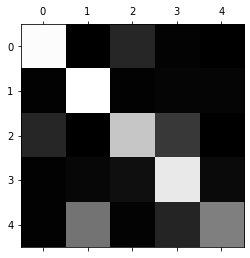

"\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model the majority of light colored squares lie on the diagonal, indicating correct classification.  One quare that sticks\nout is class 4 being classified as class one, which seems a little odd, however the lack of values may be impacting how the\ncoordiantes are percieved.  It could be possible that one user's grabbing position resembles another users stop depending on hand size and\ncoordinate location\n"

In [68]:
y_train_pred = cross_val_predict(ovo_clf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model the majority of light colored squares lie on the diagonal, indicating correct classification.  One quare that sticks
out is class 4 being classified as class one, which seems a little odd, however the lack of values may be impacting how the
coordiantes are percieved.  It could be possible that one user's grabbing position resembles another users stop depending on hand size and
coordinate location
'''

## PCA Analysis

In [69]:
#PCA using SCIKIT Learn

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_test_reduced= pca.fit_transform(X_test)
pca.n_components_

24

### One vs all Classifier after PCA transformation

In [70]:
sgd_clf_PCA = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf_PCA.fit(X_reduced, y_train)


cross_val_score(sgd_clf_PCA, X_reduced, y_train, cv=3, scoring="accuracy")

array([0.73389033, 0.73863145, 0.74842737])

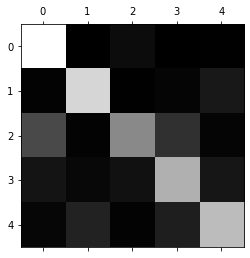

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again there is a discrepancy in class 2 being classified as class 0.\nAnd again similar to other models, class 2 and 3 classifications are a little off as well. \n'

In [71]:
y_train_pred = cross_val_predict(sgd_clf_PCA, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again there is a discrepancy in class 2 being classified as class 0.
And again similar to other models, class 2 and 3 classifications are a little off as well. 
'''

### One vs One after PCA

In [72]:
ovo_clf_PCA = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf_PCA.fit(X_train, y_train)

print("There are", len(ovo_clf_PCA.estimators_), "estimators.")

print("Accuracy:",cross_val_score(ovo_clf_PCA, X_test_reduced, y_test, cv=3, scoring="accuracy").mean())


cross_val_score(ovo_clf_PCA, X_reduced, y_train, cv=3, scoring="accuracy")

There are 10 estimators.
Accuracy: 0.752033442574361


array([0.71934121, 0.73527011, 0.71726291])

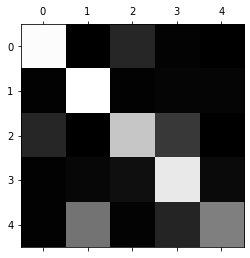

'\n0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab\n\nIn this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the \ndiscrepancies occur around the class 2 and 3 classification, consistent with previous models.  Again the square of class 4 is being classified as class one, \nand reasons for this discrepancy were mentioned above.\n'

In [73]:
y_train_pred = cross_val_predict(ovo_clf_PCA, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

'''
0 = fist, 1 = stop, 2 = one finger point, 3 = two finger point, 4 = grab

In this model the majority of light colored squares lie on the diagonal, indicating correct classification.  Again the 
discrepancies occur around the class 2 and 3 classification, consistent with previous models.  Again the square of class 4 is being classified as class one, 
and reasons for this discrepancy were mentioned above.
'''

## Descision Tree Classifier 

In [74]:
'''
Again we used the decision tree classifier to try for better accuracy.  Here we are creating the classifier and training it with the above training sets created for the previous models (SGD classifier)
We then used the model to predict the y values based on the test set.  
'''

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

In [75]:
# Model Accuracy, how often is the classifier correct?
'''
From this we were able to calculate accuracy.  The decision tree model performed better than all of the SGD classifiers trained
above.  This had an accuracy of 0.95, which is similar to the previous decision tree classifier accuracy as well.  Based on the similarities, it seems that replacing the missing values with some
type of number (0 or imputed) resulted in better models compared to removing missing values
'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9552468147768743


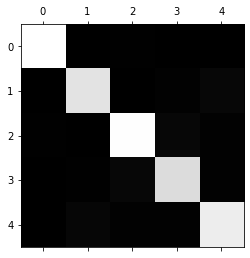

In [76]:
# Add a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.235079 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.235079 to fit



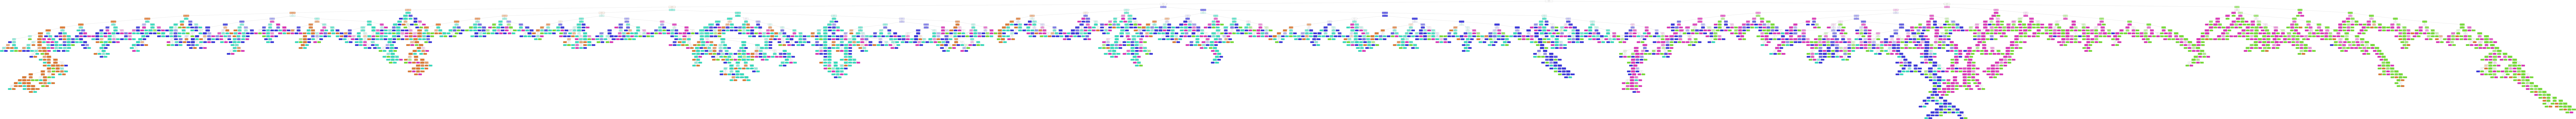

## visualization before missing value

In [ ]:
sbn.heatmap(df.isnull())

In [ ]:
sbn.heatmap(df_Imputed.isnull())

## Conclusions

- In all of the methods used to deal with midding values, the SGD classifier using the OvO method performed the best with higher accuracies compared to the OvA models.
- In each of the methods used, SGD classifier models ran after PCA reduction had better performance overall compared to the original SGD models. It seems that the ability of PCA to determine the important attributes for variaton was beneficial to these models.  Although fewer attributes were used, they covered the majority of variation for an improved model in the end.
- When comparing different classification methods, the Decision tree was a better classifier than the SGD classifier.
- The classes representing one finger point and two finger point were misclassified most often.  From the beginning we could tell that one finger point, two finger point, and stop hand positions had similarities between them when logically thinking about where markers would be located. We were not surprised to see misclassifications in these areas, especially when half of the markers contained a fair number of missing values.  We also somewhat expected a fist and grabbing motion to be similar; however, this was not seen in our models.  For the most part, a fist was typically accurately predicted.  We assume this is likely due to the fingertips being curled under the palm which is not exactly similar to a grab motion.
- If we had more time, we planned to use interpolation to fill missing values.  It would have been interesting to see how another method of replacing values would impact a different model
- Models performed decently well; however, it would be interesting to see how more accurate recordings would impact results

